In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS, same_color
import pickle
import sys
import glob 
import os
import re

def find_data(datadir,wdet):
    data = []    
    for (root, dirs, files) in os.walk(datadir):
        for file in files:
            if wdet in file:
                file_path = os.path.join(root, file)
                data.append(file_path)
    return data

def extract_number(file):
    m = re.search(r"ox_([+-]?\d+\.\d+)", file)
    return float(m.group(1)) if m else 0.0

def extract_number2(file):
    m = re.search(r"o1-(\d+\.\d+)", file)
    return float(m.group(1)) if m else 0.0 


# TDDFT-Convergence

In [10]:
files = find_data("TDDF-LRC/Gau-PBE/calc-3","run.eps")
sorted_files = sorted(files, key=extract_number)
sorted_files

[]

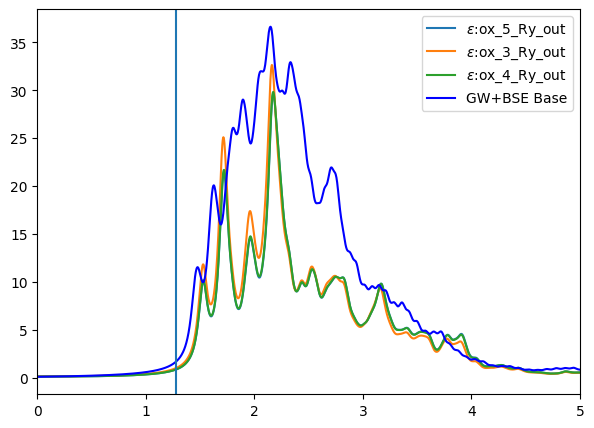

In [9]:
data = sorted(files, key=extract_number)
d2plot = [np.loadtxt(i) for i in data]
bse_base = np.loadtxt("../count-1/BSE/bse-eps-outputs/o-bse_7_run.eps_q1_haydock_bse")

ld1 = 0
ld2 = 0
plt.figure(figsize=(7,5))
for i in range(len(data)):
    plt.plot(d2plot[i][:,0],d2plot[i][:,1],label=fr"$\varepsilon$:{data[i].split('/')[-2]}")

plt.plot(bse_base[:,0],bse_base[:,1],"b",label="GW+BSE Base")
plt.axvline(x=1.28,ymin=0,ymax=50)
#plt.ylim([0,10])
plt.xlim([0,5])
plt.legend()
plt.show()

## BSE vs RPA vs TDDFT

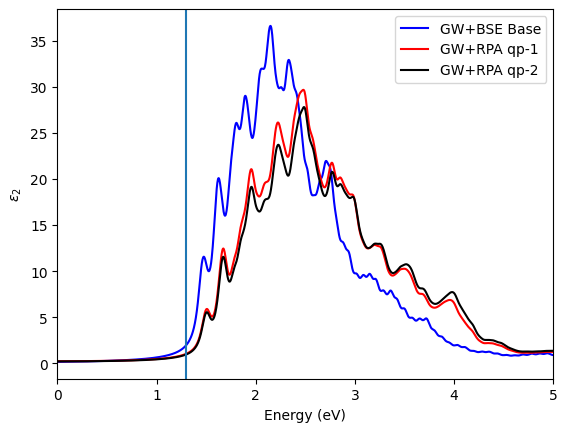

In [16]:
bse_base = np.loadtxt("../count-1/BSE/bse-eps-outputs/o-bse_7_run.eps_q1_haydock_bse")
rpa = np.loadtxt("./RPA/rpa_qp_1_out/o-rpa_qp_1_run.eps_q1_inv_rpa_dyson")
rpa2 = np.loadtxt("./RPA/rpa_qp_2_out/o-rpa_qp_2_run.eps_q1_inv_rpa_dyson")

plt.plot(bse_base[:,0],bse_base[:,1],"b",label="GW+BSE Base")
plt.plot(rpa[:,0],rpa[:,1],"r",label="GW+RPA qp-1")
plt.plot(rpa2[:,0],rpa2[:,1],"k",label="GW+RPA qp-2")

plt.axvline(x=1.3,ymin=0,ymax=50)
plt.xlim([0.0,5.0])
plt.xlabel("Energy (eV)")
plt.ylabel(r"$\varepsilon_{2}$")
plt.legend()
plt.show()

## TDDFT - B3LYP Strain

In [17]:
def xyeps(path,calc,dir):
    dir_eps = []
    for i in glob.glob(f"{path}/eps-{calc}-*"):
        ieps = glob.glob(f"{i}/o{dir}-*_out")
        for j in ieps:
            jeps = glob.glob(f"{j}/*run.eps*")
            if len(jeps) > 0:
                dir_eps.append(jeps[0])
                     
    def extract_number(file):
        m = re.search(fr"o-o{dir}-eps-{calc}-([+-]?\d+\.\d+)", file)
        return float(m.group(1)) if m else 0.0
    data = sorted(dir_eps, key=extract_number)
    d2plot = [np.loadtxt(i) for i in data]
    return d2plot,data

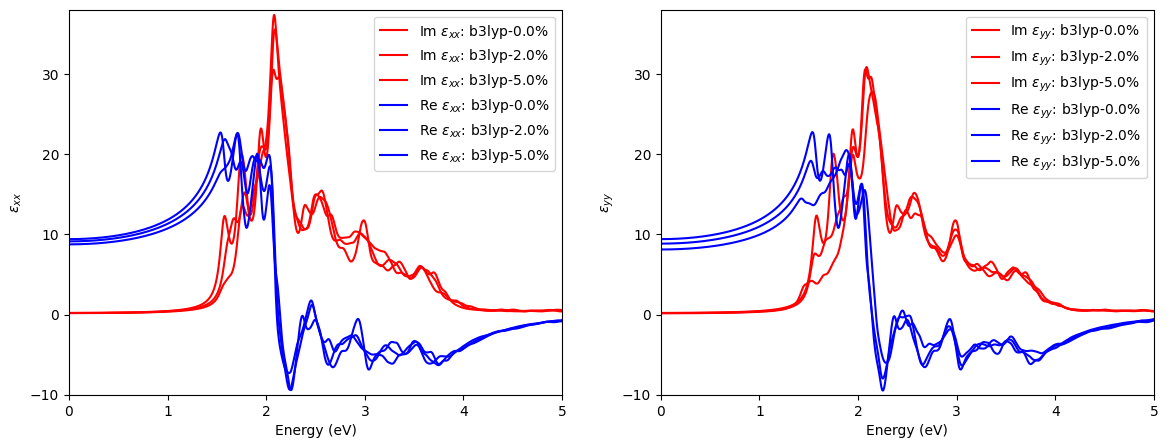

In [45]:
d2plotx,datax = xyeps("TDDFT-LRC/B3LYP","b3lyp","x")  
d2ploty,datay = xyeps("TDDFT-LRC/B3LYP","b3lyp","y")  

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
for i in [0,2,5]:
    ax1.plot(d2plotx[i][:,0],d2plotx[i][:,1],'-r',label=fr"Im $\varepsilon_{{xx}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")

for i in [0,2,5]:
    ax1.plot(d2plotx[i][:,0],d2plotx[i][:,2],'-b',label=fr"Re $\varepsilon_{{xx}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")
    
ax1.set_ylim([-10,38])
ax1.set_xlim([0,5])
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel(r"$\varepsilon_{xx}$")

for i in [0,2,5]:
    ax2.plot(d2ploty[i][:,0],d2ploty[i][:,1],'-r',label=fr"Im $\varepsilon_{{yy}}$: {datay[i].split('/')[-2].split('_')[-2].split('oy-eps-')[-1]}%")
    
for i in [0,2,5]:
    ax2.plot(d2ploty[i][:,0],d2ploty[i][:,2],'-b',label=fr"Re $\varepsilon_{{yy}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")

ax2.set_ylim([-10,38])
ax2.set_xlim([0,5])
ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel(r"$\varepsilon_{yy}$")
ax1.legend()
ax2.legend()
plt.show()


## TDDFT - GauPBE Strain

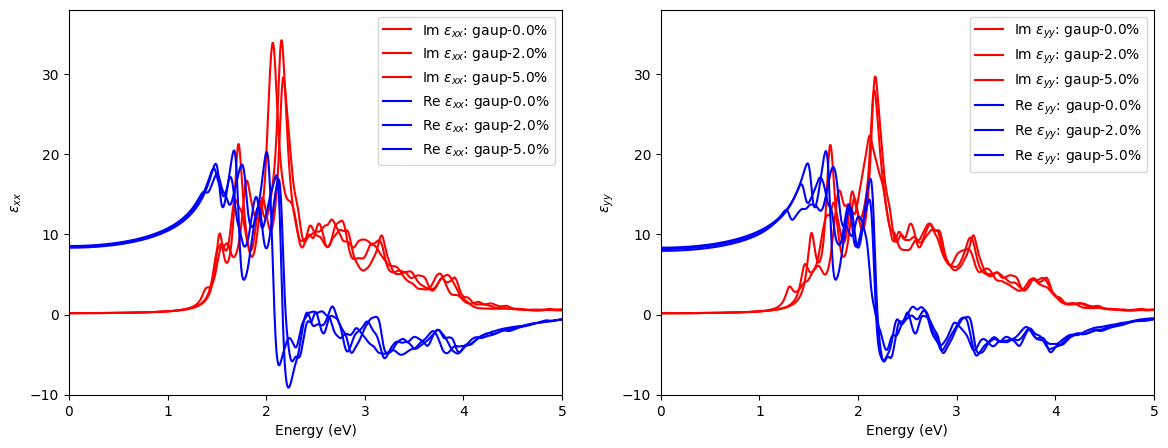

In [46]:
d2plotx,datax = xyeps("TDDFT-LRC/Gau-PBE/calc-4","gaup","x")    
d2ploty,datay = xyeps("TDDFT-LRC/Gau-PBE/calc-4","gaup","y")    


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
for i in [0,2,5]:
    ax1.plot(d2plotx[i][:,0],d2plotx[i][:,1],'-r',label=fr"Im $\varepsilon_{{xx}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")

for i in [0,2,5]:
    ax1.plot(d2plotx[i][:,0],d2plotx[i][:,2],'-b',label=fr"Re $\varepsilon_{{xx}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")
    
ax1.set_ylim([-10,38])
ax1.set_xlim([0,5])
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel(r"$\varepsilon_{xx}$")

for i in [0,2,5]:
    ax2.plot(d2ploty[i][:,0],d2ploty[i][:,1],'-r',label=fr"Im $\varepsilon_{{yy}}$: {datay[i].split('/')[-2].split('_')[-2].split('oy-eps-')[-1]}%")
    
for i in [0,2,5]:
    ax2.plot(d2ploty[i][:,0],d2ploty[i][:,2],'-b',label=fr"Re $\varepsilon_{{yy}}$: {datax[i].split('/')[-2].split('_')[-2].split('ox-eps-')[-1]}%")

ax2.set_ylim([-10,38])
ax2.set_xlim([0,5])
ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel(r"$\varepsilon_{yy}$")
ax1.legend()
ax2.legend()
plt.show()



In [44]:
xyeps("TDDFT-LRC/Gau-PBE/calc-4","gaup","x") 

([array([[ 0.000000e+00,  1.674750e-01,  8.326597e+00,  1.380170e-01,
           7.848213e+00],
         [ 3.333000e-03,  1.674770e-01,  8.326614e+00,  1.380180e-01,
           7.848226e+00],
         [ 6.667000e-03,  1.674810e-01,  8.326664e+00,  1.380210e-01,
           7.848267e+00],
         ...,
         [ 4.993333e+00,  5.939450e-01, -6.345250e-01,  7.290710e-01,
          -4.744660e-01],
         [ 4.996667e+00,  5.925440e-01, -6.315480e-01,  7.299590e-01,
          -4.725660e-01],
         [ 5.000000e+00,  5.907370e-01, -6.283510e-01,  7.303530e-01,
          -4.707180e-01]]),
  array([[ 0.000000e+00,  1.690570e-01,  8.374672e+00,  1.392840e-01,
           7.893674e+00],
         [ 3.333000e-03,  1.690580e-01,  8.374689e+00,  1.392850e-01,
           7.893688e+00],
         [ 6.667000e-03,  1.690620e-01,  8.374740e+00,  1.392880e-01,
           7.893729e+00],
         ...,
         [ 4.993333e+00,  5.418990e-01, -5.948760e-01,  6.878950e-01,
          -4.312520e-01],
         [